#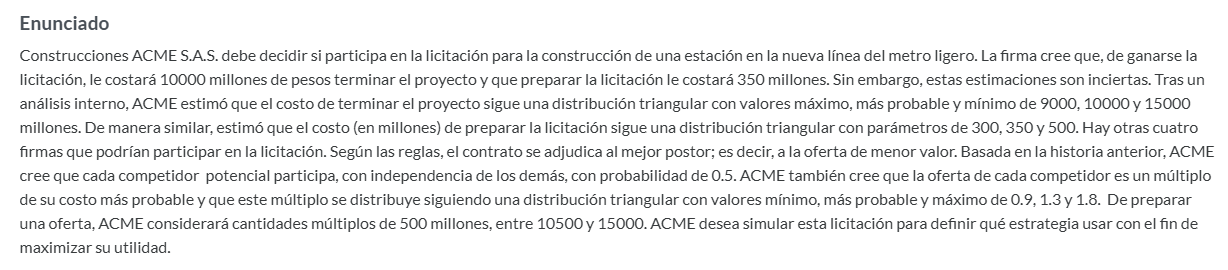

- **Costo de terminar el proyecto:** triangular(a = 9000, b = 15000, c = 10000)[millones]

- **Costo de preparar la licitación:** triangular(a = 300, b = 500, c = 350) [millones]

- El contrato lo gana aquel que tenga un menor "costo de preparar licitación".

- **Probabilidad de participación de cada competidor:** p = 0.5

- Oferta_competidor = rK, r = triangular(a = 0.9, b = 1.8, c=1.3), K = costo más probable de el triangular de licitación para cada competidor.

- **Ofertas admitibles ACME metro:** 10500, 11000, 11500, ..., 14500, 15000

- **Utilidad:** _Max(Ingresos - Costos)_

- En fin, se escogerá aquel competidor que maximice la utilidad, dada la oferta propuesta por ACME.

Ingrese el número de simulaciones: 1000000
Las ganadas por cada oferta son: {10500: 817999, 11000: 732641, 11500: 632808, 12000: 523212, 12500: 411536, 13000: 302931, 13500: 213439, 14000: 148161, 14500: 100985, 15000: 66791}


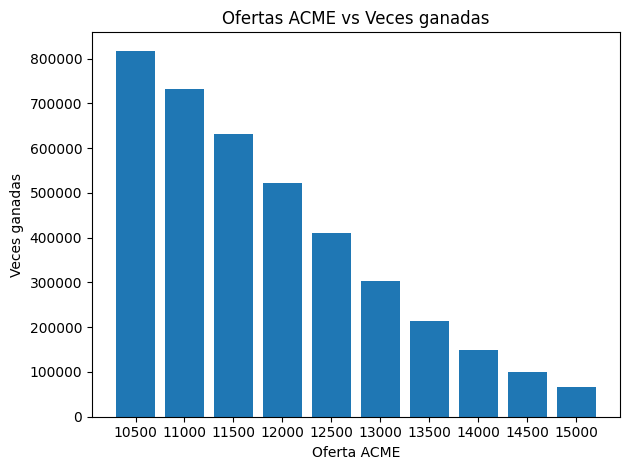

El tamaño de muestra requerido para la oferta favorita 13000 es: 544.5162421309813
Con una confianza del 95%, si ACME oferta 13000 millones por el proyecto generaría utilidades de entre estos valores:
[224.5815920142913, 229.01521765714034]


In [4]:
# Paso 1. Definir la función para la distribución triangular

import matplotlib.pyplot as plt
import random

def triangular(valor_minimo, moda, valor_maximo):
  a = valor_minimo
  b = valor_maximo
  c = moda
  r = random.random()
  r1 = (c-a)/(b-a)

  if r <= r1:
    observacion = a + (r*(b-a)*(c-a))**(1/2)
  else:
    observacion = b - ((1-r)*(b-a)*(b-c))**(1/2)

  return observacion

# Paso 2. Definir una función que muestre cuál(es) de los competidores entra al juego, teniendo en cuenta que cada uno de los 4 puede entrar con probabilidad de 0.5

def competidores_participantes():
    competidores = ['A', 'B', 'C', 'D']
    participantes = []
    for competidor in competidores:
      r = random.random()
      if r >= 0.5: #Si su probabilidad (random) de entrar es menor a 0.5, entra como participante.
            participantes.append(competidor)
    return participantes

# Paso 3. Definir una función que arroje la oferta de cada competidor, dado que Oferta = (multiplo de triangular(c))

def oferta_competidores(parti = list):
  ofertas = []
  for participantes in parti:
    multiplo = triangular(0.9, 1.3, 1.8)
    oferta = 10000*multiplo
    ofertas.append(oferta)
  return ofertas

# Paso 4. Definir la función que calcule la utilidad de ACME (ya sea que gane o no).

ofertas_ACME = [10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000]

def ACME_utilidad_ganadora(oferta):
  costo_terminacion = triangular(9000, 10000, 15000)
  costo_licitacion = triangular(300, 350, 500)
  costos = costo_terminacion + costo_licitacion
  utilidad_ACME = oferta - costos
  return utilidad_ACME

def ACME_utilidad_perdedor(ofert):
  costo_licitacion = triangular(300, 350, 500)
  utilidad_ACME = -costo_licitacion
  return utilidad_ACME

# Paso 5. Correr n simulaciones para comprar cada una de las posibles ofertas de ACME con las posibles ofrecidas por los posibles competidores.

ganadas_ACME = {10500:0, 11000:0, 11500:0, 12000:0, 12500:0, 13000:0, 13500:0, 14000:0, 14500:0, 15000:0}

n = int(input('Ingrese el número de simulaciones: '))

utilidades = [[], [], [], [], [], [], [], [], [], []] #Esta lista vacía coleccionará las utilidades de todas las ofertas en todas las simulaciones, gane o pierda ACME.

for simulacion in range(n):
  ofertas = oferta_competidores(competidores_participantes())
  for i in range(len(utilidades)):
    if len(ofertas)>0:
      if ofertas_ACME[i] < min(ofertas):
        utilidades[i].append(ACME_utilidad_ganadora(ofertas_ACME[i]))
      else:
        utilidades[i].append(ACME_utilidad_perdedor(ofertas_ACME[i]))
    else: #en caso de que no haya más competencia, obvio ACME ganará.
      utilidades[i].append(ACME_utilidad_ganadora(ofertas_ACME[i]))

  if len(ofertas)>0:
    for oferta in ofertas_ACME:
      if oferta < min(ofertas):
        ganadas_ACME[oferta] += 1

print(f'Las ganadas por cada oferta son: {ganadas_ACME}')

nombressss = ["10500", "11000", "11500", "12000", "12500", "13000", "13500", "14000", "14500", "15000"]
ganadas = list(ganadas_ACME.values())

plt.bar(nombressss, ganadas)
plt.xlabel('Oferta ACME')
plt.ylabel('Veces ganadas')
plt.title('Ofertas ACME vs Veces ganadas')
plt.tight_layout()
plt.show()

# Paso 6. Calcular las utilidades promedio en n simulaciones para cada una de las distintas ofertas propuestas por ACME, para ver cuál sería la mejor estrategia.

# for utilidad_oferta in utilidades: #Con suficientes simulaciones (+100.000) se nota que suele resultar una mejor utilidad cuando se oferta 13.000.
#   acum = 0 #(ctrl+k+u para descomentar toda la selección, ctrl+k+c para volverla a comentar)
#   for utilidad_simul in utilidad_oferta:
#     acum += utilidad_simul
#   promedio = acum/n
#   print(f'La utilidad promedio en {n} simulaciones para ACME, ofertando es: {promedio}')

# Paso 7. Calcular el tamaño de muestra necesario, con un error de 5 millones (0.05).

# Paso 7.1. Definir función para el cálculo de la desviación estándar.

def desv_estandar(muestra = list):
  media_muestral = sum(muestra)/len(muestra)
  acumulador = 0
  for obs in muestra:
    acumulador += (obs-media_muestral)**2
  desv_estandar = ((acumulador)/(len(muestra)-1))**(1/2)
  return desv_estandar, media_muestral

precisionD = 100*(1-0.05) #se requiere un nivel de confianza del 95%
error = 5 #[millones]
Z = 1.96 #en las tablas de distribución normal, este es el valor de Z(0.05/2)

desv_estandar, media_muestral = desv_estandar(utilidades[5]) #el elemento 6 (index=5) de la lista utilidades corresponde a las utilidades de la oferta 13000.
tamaño_muestra = ((Z*desv_estandar)/precisionD)**2

print(f'El tamaño de muestra requerido para la oferta favorita 13000 es: {tamaño_muestra}')

# Paso 8. Finalmente, calcular los intervalos de confianza.
# Se sabe que se usarán por lo menos 540 simulaciones, al ser mayor que 30, podemos calcular los intervalos de confianza aproximando la distribución a una normal.

mitad_intervalo = Z*desv_estandar/(n**(1/2))

intervalo_inferior = media_muestral - mitad_intervalo
intervalo_superior = media_muestral + mitad_intervalo

print(f'Con una confianza del 95%, si ACME oferta 13000 millones por el proyecto generaría utilidades de entre estos valores:')
print(f'[{intervalo_inferior}, {intervalo_superior}]')